# PAINTOR multi-ethnic fine-mapping

In [1]:
library(data.table)
library(dplyr)
library(ggplot2)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
setwd("~/project-gandalm/isoform_twas/eqtl_new/")

In [3]:
eur <- fread("results/eur_perm_50HCP/all_assoc_perm_info.txt", data.table = F)
amr <- fread("results/amr_perm_15HCP/all_assoc_perm_info.txt", data.table = F)
afr <- fread("results/afr_perm_25HCP/all_assoc_perm_info.txt", data.table = F)

In [4]:
eur <- eur %>% filter(qval < .05)
amr <- amr %>% filter(qval < .05)
afr <- afr %>% filter(qval < .05)

In [5]:
dim(eur)
dim(amr)
dim(afr)

[1] 5296   15

[1] 3242   15

[1] 1876   15

In [14]:
shared <- eur %>% inner_join(amr, by = "pid") %>% inner_join(afr, by = "pid")
dim(shared)
head(shared)

[1] 986  43

,pid,nvar.x,shape1.x,shape2.x,dummy.x,sid.x,dist.x,npval.x,slope.x,ppval.x,...,sid,dist,npval,slope,ppval,bpval,qval,pval_nominal_threshold,gene_type,gene_name
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,...,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,ENSG00000001460,3692,1.05363,549.578,194.756,rs10489442,5655,5.76494e-25,-0.526664,9.999e-05,...,rs4592213,-1605,2.36174e-08,-1.062000,0.00019998,8.55103e-05,0.00192143,6.73094e-06,protein_coding,STPG1
2,ENSG00000002016,5008,1.04169,774.517,197.950,rs2887532,-47724,1.22335e-15,-0.466916,9.999e-05,...,rs3748523,-40481,8.68694e-07,-0.656173,0.00199980,2.72042e-03,0.03257760,4.62047e-06,protein_coding,RAD52
3,ENSG00000004534,2064,1.02671,132.097,191.012,rs6765484,63873,4.05994e-26,0.345270,9.999e-05,...,rs1357448049,55259,6.97000e-07,0.335468,0.00049995,6.37599e-04,0.01009900,4.36444e-05,protein_coding,RBM6
4,ENSG00000005801,4859,1.04382,761.473,194.033,rs112127733,5192,5.47218e-14,-0.316902,9.999e-05,...,chr11:3381737,2515,5.62582e-08,-0.399708,0.00009999,2.38548e-04,0.00447343,4.28499e-06,protein_coding,ZNF195
5,ENSG00000006007,4453,1.05372,545.913,192.512,rs11644848,35249,8.67388e-13,0.298892,9.999e-05,...,chr16:19499062,-23061,4.61409e-08,-0.317379,0.00029997,1.50476e-04,0.00306791,6.62136e-06,protein_coding,GDE1
6,ENSG00000008018,2578,1.05338,289.894,189.177,rs12527004,40474,5.32962e-26,-0.329155,9.999e-05,...,rs12717,-95,4.86128e-07,-0.244166,0.00129987,9.92135e-04,0.01449280,1.31916e-05,protein_coding,PSMB1


In [15]:
shared <- shared %>% select(pid)
shared$gene_id <- shared$pid
colnames(shared) <- c("gene_index", "gene_id")
write.table(shared, "paintor/eur_amr_afr_shared_egenes.txt", col.names = T, row.names = F, quote = F, sep = "\t")

### Select ENSG00000117899 (MESD) as an example to test run PAINTOR, ultimately should have 986 locus files (or 10094 ALL eGene)
- 3872 shared cis variants

In [3]:
eur_nominal <- fread("results/eur_nominal_50HCP/eur_ENSG00000117899.all_assoc.txt", header = F, data.table = F)
amr_nominal <- fread("results/amr_nominal_15HCP/amr_ENSG00000117899.all_assoc.txt", header = F, data.table = F)
afr_nominal <- fread("results/afr_nominal_25HCP/afr_ENSG00000117899.all_assoc.txt", header = F, data.table = F)

In [4]:
head(eur_nominal)
head(amr_nominal)
dim(eur_nominal)
dim(amr_nominal)
dim(afr_nominal)

,V1,V2,V3,V4,V5,V6
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>
1,ENSG00000117899,rs72736580,-999112,0.671547,-0.0519136,0.9836779
2,ENSG00000117899,rs143184731,-998090,0.439940,0.1253850,0.9613369
3,ENSG00000117899,rs77161014,-996975,0.472903,0.1152430,0.9655408
4,ENSG00000117899,rs764585765,-995876,0.405902,0.0432230,0.9562402
5,ENSG00000117899,rs62025524,-994235,0.433346,0.0336609,0.9603563
6,ENSG00000117899,rs62025525,-994139,0.771454,0.0133245,0.9898541


,V1,V2,V3,V4,V5,V6
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>
1,ENSG00000117899,rs72736580,-999112,0.923601,0.0227704,0.9971841
2,ENSG00000117899,rs80177037,-998779,0.430707,0.2210340,0.9615601
3,ENSG00000117899,rs1315806024,-998569,0.238645,0.1094050,0.9248418
4,ENSG00000117899,rs142455349,-998393,0.935616,-0.0231190,0.9976580
5,ENSG00000117899,rs143184731,-998090,0.818756,0.0198716,0.9923720
6,ENSG00000117899,rs16971646,-997860,0.935616,-0.0231190,0.9976580


[1] 4708    6

[1] 5648    6

[1] 6744    6

In [5]:
shared <- eur_nominal %>% inner_join(amr_nominal, by="V2") %>% inner_join(afr_nominal, by="V2")
dim(shared)
head(shared)

[1] 3872   16

,V1.x,V2,V3.x,V4.x,V5.x,V6.x,V1.y,V3.y,V4.y,V5.y,V6.y,V1,V3,V4,V5,V6
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>
1,ENSG00000117899,rs72736580,-999112,0.671547,-0.0519136,0.9836779,ENSG00000117899,-999112,0.923601,0.0227704,0.9971841,ENSG00000117899,-999112,0.493079,-0.2926510,0.9857481
2,ENSG00000117899,rs143184731,-998090,0.439940,0.1253850,0.9613369,ENSG00000117899,-998090,0.818756,0.0198716,0.9923720,ENSG00000117899,-998090,0.903091,0.0114259,0.9984839
3,ENSG00000117899,rs77161014,-996975,0.472903,0.1152430,0.9655408,ENSG00000117899,-996975,0.271806,0.3064540,0.9337612,ENSG00000117899,-996975,0.909239,0.0134678,0.9986094
4,ENSG00000117899,rs764585765,-995876,0.405902,0.0432230,0.9562402,ENSG00000117899,-995876,0.700033,0.0442587,0.9858175,ENSG00000117899,-995876,0.730290,0.0614421,0.9945278
5,ENSG00000117899,rs62025524,-994235,0.433346,0.0336609,0.9603563,ENSG00000117899,-994235,0.461211,0.0556486,0.9652778,ENSG00000117899,-994235,0.553532,-0.0738376,0.9886096
6,ENSG00000117899,rs62025525,-994139,0.771454,0.0133245,0.9898541,ENSG00000117899,-994139,0.156854,0.1325850,0.8938573,ENSG00000117899,-994139,0.829273,-0.0297097,0.9968908


### Input 1: Locus file. Calculate ZSCORE from pval

In [39]:
shared <- shared %>% mutate(z.x = sign(V5.x)*abs(qnorm(V4.x/2))) %>% 
                     mutate(z.y = sign(V5.y)*abs(qnorm(V4.y/2))) %>% 
                     mutate(z = sign(V5)*abs(qnorm(V4/2)))

In [46]:
# test other methods
shared <- shared %>% mutate(z.x1 = sign(V5.x)*sqrt(qchisq(V4.x,1,lower=FALSE))) %>% 
                     mutate(z.y1 = sign(V5.y)*sqrt(qchisq(V4.y,1,lower=FALSE))) %>% 
                     mutate(z1 = sign(V5)*sqrt(qchisq(V4,1,lower=FALSE)))
shared <- shared %>% mutate(z.x2 = ifelse(V5.x < 0, qnorm(V4.x/2), qnorm(1-V4.x/2))) %>% 
                     mutate(z.y2 = ifelse(V5.y < 0, qnorm(V4.y/2), qnorm(1-V4.y/2))) %>% 
                     mutate(z2 = ifelse(V5 < 0, qnorm(V4/2), qnorm(1-V4/2)))

In [48]:
cor(shared$z.x1,shared$z.x)
cor(shared$z.y1,shared$z.y)
cor(shared$z1,shared$z)

cor(shared$z.x2,shared$z.x)
cor(shared$z.y2,shared$z.y)
cor(shared$z2,shared$z)

[1] 1

[1] 1

[1] 1

[1] 1

[1] 1

[1] 1

In [55]:
sum(shared$z == shared$z1)

[1] 999

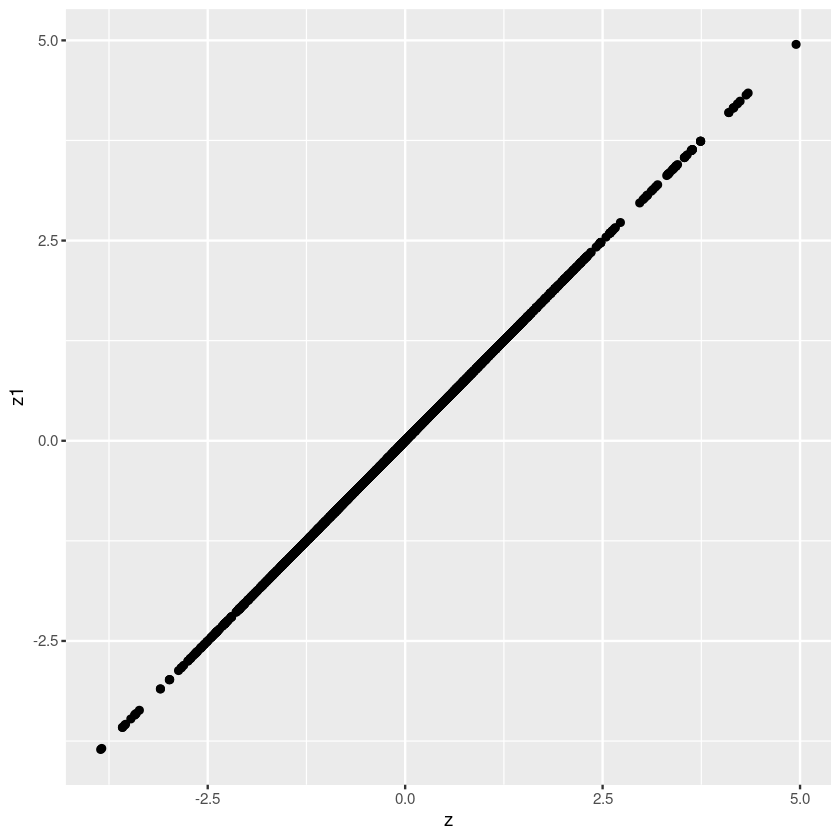

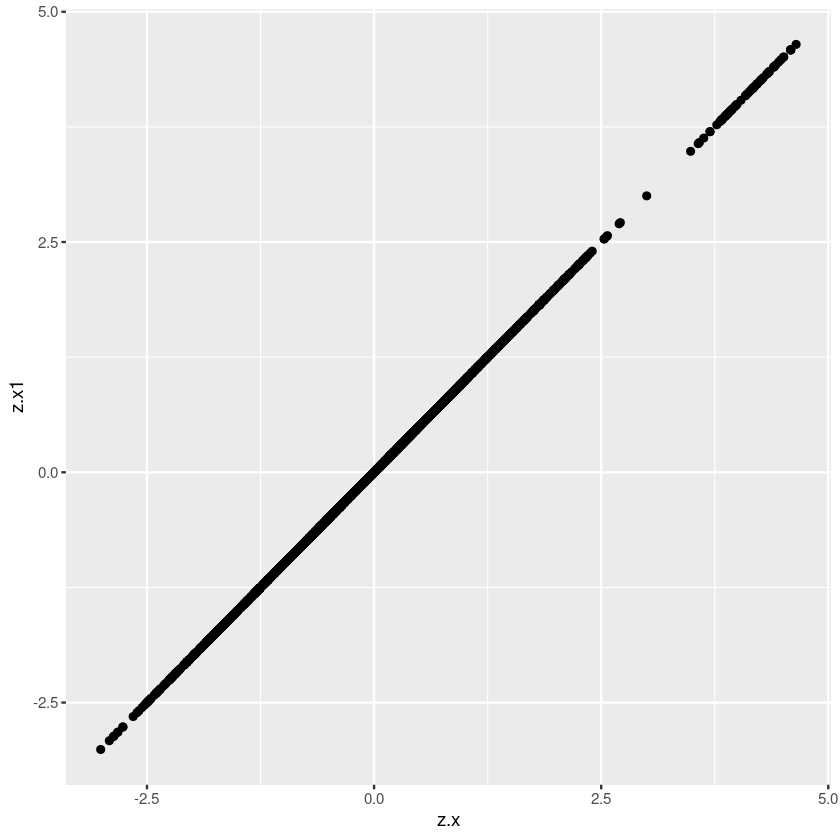

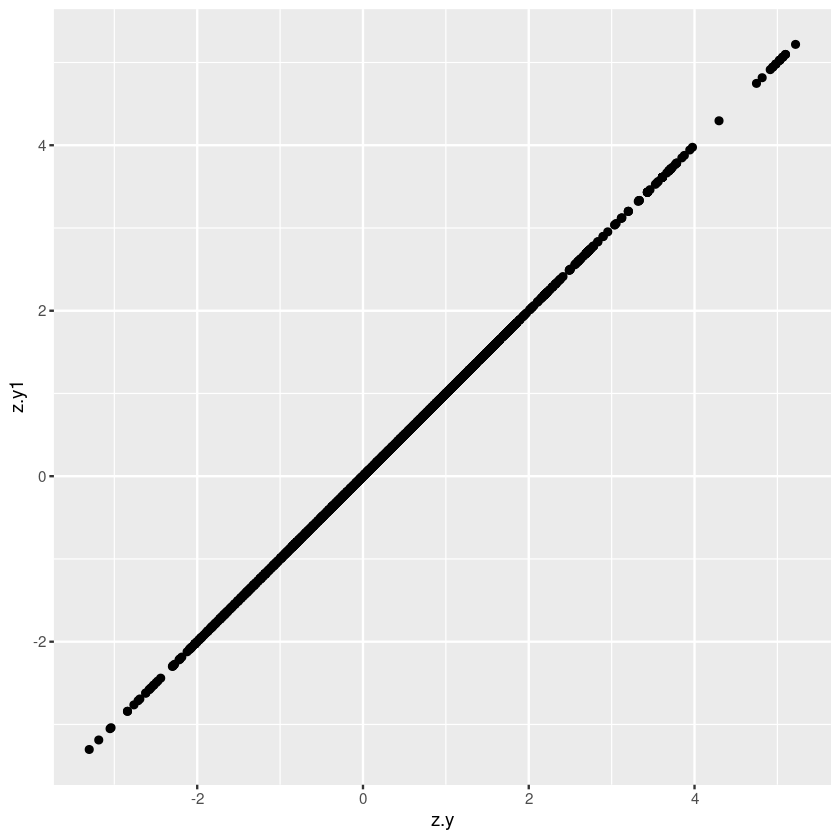

In [56]:
ggplot(shared, aes(x = z, y = z1)) +
    geom_point()
ggplot(shared, aes(x = z.x, y = z.x1)) +
    geom_point()
ggplot(shared, aes(x = z.y, y = z.y1)) +
    geom_point()

In [51]:
head(shared)

,V1.x,V2,V3.x,V4.x,V5.x,V6.x,V1.y,V3.y,V4.y,V5.y,...,V6,z,z.y,z.x,z.x1,z.y1,z1,z.x2,z.y2,z2
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,ENSG00000117899,rs72736580,-999112,0.671547,-0.0519136,0.9836779,ENSG00000117899,-999112,0.923601,0.0227704,...,0.9857481,-0.6854199,0.09589873,-0.4240258,-0.4240258,0.09589873,-0.6854199,-0.4240258,0.09589873,-0.6854199
2,ENSG00000117899,rs143184731,-998090,0.439940,0.1253850,0.9613369,ENSG00000117899,-998090,0.818756,0.0198716,...,0.9984839,0.1217576,0.22914528,0.7722945,0.7722945,0.22914528,0.1217576,0.7722945,0.22914528,0.1217576
3,ENSG00000117899,rs77161014,-996975,0.472903,0.1152430,0.9655408,ENSG00000117899,-996975,0.271806,0.3064540,...,0.9986094,0.1139985,1.09891304,0.7177637,0.7177637,1.09891304,0.1139985,0.7177637,1.09891304,0.1139985
4,ENSG00000117899,rs764585765,-995876,0.405902,0.0432230,0.9562402,ENSG00000117899,-995876,0.700033,0.0442587,...,0.9945278,0.3447398,0.38527592,0.8311268,0.8311268,0.38527592,0.3447398,0.8311268,0.38527592,0.3447398
5,ENSG00000117899,rs62025524,-994235,0.433346,0.0336609,0.9603563,ENSG00000117899,-994235,0.461211,0.0556486,...,0.9886096,-0.5924758,0.73685423,0.7834788,0.7834788,0.73685423,-0.5924758,0.7834788,0.73685423,-0.5924758
6,ENSG00000117899,rs62025525,-994139,0.771454,0.0133245,0.9898541,ENSG00000117899,-994139,0.156854,0.1325850,...,0.9968908,-0.2156341,1.41573195,0.2904735,0.2904735,1.41573195,-0.2156341,0.2904735,1.41573195,-0.2156341


In [10]:
shared <- shared %>% select(V2, z.x, z.y, z)
head(shared)

,V2,z.x,z.y,z
,<chr>,<dbl>,<dbl>,<dbl>
1,rs72736580,-0.4240258,0.09589873,-0.6854199
2,rs143184731,0.7722945,0.22914528,0.1217576
3,rs77161014,0.7177637,1.09891304,0.1139985
4,rs764585765,0.8311268,0.38527592,0.3447398
5,rs62025524,0.7834788,0.73685423,-0.5924758
6,rs62025525,0.2904735,1.41573195,-0.2156341


In [11]:
colnames(shared) <- c("RSID", "ZSCORE.P1", "ZSCORE.P2", "ZSCORE.P3")
write.table(shared, "paintor/MESDC2/Locus1", col.names = T, row.names = F, sep = " ", quote = F)

In [12]:
id <- shared %>% select(RSID)
write.table(id, "paintor/MESDC2/shared_variants.txt", col.names = F, row.names = F, quote = F, sep = "\t")

### Input 2: LD. Use plink to estimate LD of the shared variants in all 3 populations
**Update: this is wrong! PAINTOR wants signed pearson correlation r. See Snakefile**

`plink --r2 bin \
--vcf ${file} \
--extract shared_variants.txt \
--out eur`

In [16]:
# ?readBin

In [26]:
num_var=3872

In [17]:
myFile <- file('paintor/MESDC2/eur.ld.bin', 'rb')
eur_ld <- readBin(myFile, what="numeric", n=num_var*num_var, size=8)
close(myFile)

In [18]:
dim(eur_ld)

NULL

In [19]:
length(eur_ld)

[1] 14992384

In [27]:
num_var^2

[1] 14992384

In [21]:
head(eur_ld)

[1] 1.0000000000 0.0020964361 0.0018798301 0.0004047794 0.0364906086
[6] 0.0561912489

In [22]:
head(which(eur_ld == 1))

[1]     1  3874  7747 11620 11630 11631

**Don't know the order, if it's row1, row2, ... or col1, col2, ... But doesn't matter! It's the same.**

In [23]:
eur_matrix <- matrix(eur_ld, nrow = num_var)

In [24]:
dim(eur_matrix)

[1] 3872 3872

In [25]:
write.table(eur_matrix, "paintor/MESDC2/Locus1.LD1", col.names = F, row.names = F, quote = F, sep = " ")

In [28]:
myFile <- file('paintor/MESDC2/amr.ld.bin', 'rb')
amr_ld <- readBin(myFile, what="numeric", n=num_var*num_var, size=8)
close(myFile)
length(amr_ld)
amr_matrix <- matrix(amr_ld, nrow = num_var)
write.table(amr_matrix, "paintor/MESDC2/Locus1.LD2", col.names = F, row.names = F, quote = F, sep = " ")

[1] 14992384

In [29]:
myFile <- file('paintor/MESDC2/afr.ld.bin', 'rb')
afr_ld <- readBin(myFile, what="numeric", n=num_var*num_var, size=8)
close(myFile)
length(afr_ld)
afr_matrix <- matrix(afr_ld, nrow = num_var)
write.table(afr_matrix, "paintor/MESDC2/Locus1.LD3", col.names = F, row.names = F, quote = F, sep = " ")

[1] 14992384

### Input 3: annotation. Generate annotation file for the shared cis-variants
- Cannot use annotation file generated for torus, which is for the variants in ALL geontype. Does not cover all shared variants between EUR, AMR, AFR
- Generate annot from ENCODE Regulatory Build 
- Not including VEP annotations, haven't run VEP on EUR VCF
- test running with `promoter_d` only

In [30]:
head(id)

,RSID
,<chr>
1,rs72736580
2,rs143184731
3,rs77161014
4,rs764585765
5,rs62025524
6,rs62025525


In [33]:
annot <- fread("../genotype/all_data/isec_R2_greater_than_3/ancestry/annot/eur_variant_annot.txt.gz", data.table = F)
head(annot)

,SNP,TF_binding_site_d,promoter_flanking_region_d,promoter_d,open_chromatin_region_d,enhancer_d,CTCF_binding_site_d
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>
1,rs61769339,0,1,0,0,0,0
2,rs12238997,0,0,0,0,0,0
3,rs61769351,0,0,0,0,0,0
4,rs142559957,0,0,0,0,0,0
5,rs58276399,0,0,0,0,0,0
6,rs61770163,0,0,0,0,0,0


In [34]:
id <- id %>% left_join(annot, by=c("RSID"="SNP"))
dim(id)

[1] 3872    7

In [35]:
locus.id <- id %>% select(-1)

In [36]:
write.table(locus.id, "paintor/MESDC2/Locus1.annotations", col.names = T, row.names = F, quote = F, sep = " ")

In [41]:
colnames(locus.id)

[1] "TF_binding_site_d"          "promoter_flanking_region_d"
[3] "promoter_d"                 "open_chromatin_region_d"   
[5] "enhancer_d"                 "CTCF_binding_site_d"

### PAINTOR test results
- `--enumerate 2` maximum number of causal is 2
- rs9806417/chr15_81279136_G_A is the target SNP in locuszoom plot. Lead eQTL and fine-mapped eQTL in AFR, in CS of AMR and EUR
- PAINTOR result has prioritized this SNP
- ALL susie result did not!

In [3]:
res <- fread("paintor/MESDC2/Locus1.results", data.table = F)

In [4]:
head(res)

,RSID,ZSCORE.P1,ZSCORE.P2,ZSCORE.P3,Posterior_Prob
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,rs72736580,-0.4240258,0.09589873,-0.6854199,2.97448e-12
2,rs143184731,0.7722945,0.22914528,0.1217576,2.70088e-12
3,rs77161014,0.7177637,1.09891304,0.1139985,4.25359e-12
4,rs764585765,0.8311268,0.38527592,0.3447398,2.16276e-20
5,rs62025524,0.7834788,0.73685423,-0.5924758,4.24950e-12
6,rs62025525,0.2904735,1.41573195,-0.2156341,5.81782e-12


In [6]:
res %>% filter(RSID == "rs9806417")

RSID,ZSCORE.P1,ZSCORE.P2,ZSCORE.P3,Posterior_Prob
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
rs9806417,4.420496,5.026723,4.949997,0.996548


In [10]:
head(res[order(res$Posterior_Prob, decreasing = TRUE),])

,RSID,ZSCORE.P1,ZSCORE.P2,ZSCORE.P3,Posterior_Prob
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
2118,rs11419364,4.038905,4.815978,-3.552792,9.98489e-01
2106,rs9806417,4.420496,5.026723,4.949997,9.96548e-01
2072,chr15:80976374,4.261307,5.026723,4.317299,1.91323e-03
2070,rs8036618,4.088164,5.026723,4.342572,1.52684e-03
2171,rs34354527,3.580757,4.747460,-3.855291,1.50885e-03
2143,rs56246246,4.478802,5.063729,4.154549,9.50162e-06


### SuSiE results: ALL, and ancestry-specific

In [3]:
susie <- fread("results/susie_finemap/mixed/mixed_ciseqtl_90hcp_perm_purity_filtered.txt.gz", data.table = F)

In [4]:
susie_eur <- fread("results/susie_finemap/eur/eur_ciseqtl_50hcp_perm_purity_filtered.txt.gz", data.table = F)

In [5]:
susie_amr <- fread("results/susie_finemap/amr/amr_ciseqtl_15hcp_perm_purity_filtered.txt.gz", data.table = F)

In [6]:
susie_afr <- fread("results/susie_finemap/afr/afr_ciseqtl_25hcp_perm_purity_filtered.txt.gz", data.table = F)

### PAINTOR final results

In [7]:
shared_egene <- read.table("paintor/eur_amr_afr_shared_egenes.txt", header = T)

In [8]:
results <- data.frame("gene" = shared_egene$gene_index, 
                      "pip_sum" = NA)

In [9]:
sum <- NULL

In [10]:
for (gene in shared_egene$gene_index) {
    df <- fread(paste0("paintor/", gene, "_dir/", gene, ".results.2causal"), data.table = F)
    assign(gene, df)
    sum <- append(sum, sum(df$Posterior_Prob))
}

In [11]:
results$pip_sum <- sum

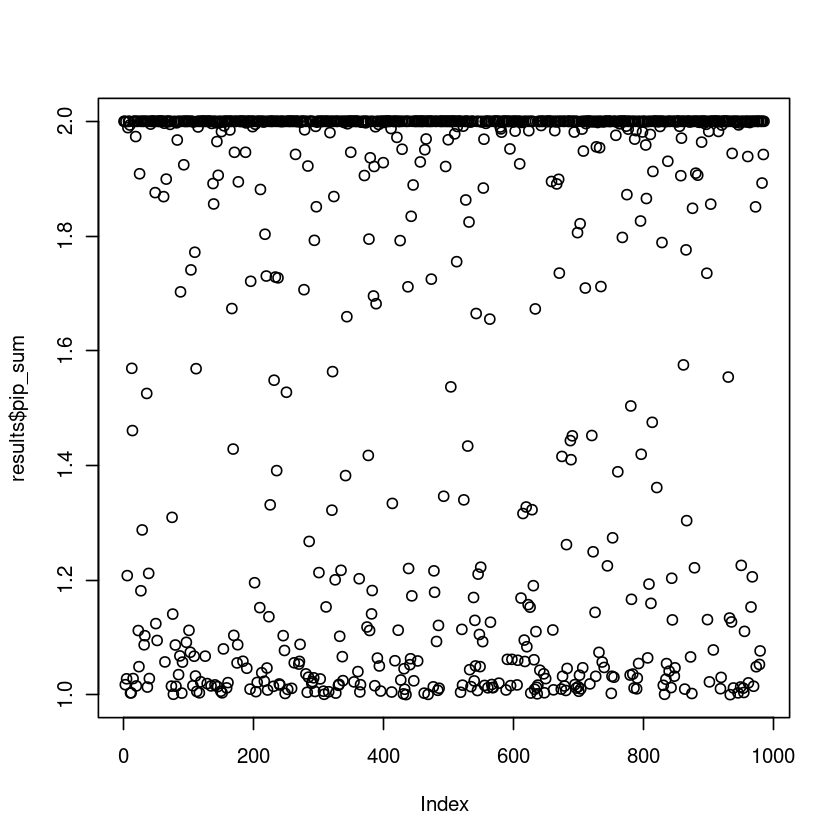

In [12]:
plot(results$pip_sum)

**Number of SNPs selected**

In [13]:
susie <- susie %>% filter(phenotype_id %in% results$gene)
dim(susie)
genes_with_cs <- unique(susie$phenotype_id)
length(unique(genes_with_cs))

[1] 29028    17

[1] 986

In [18]:
head(susie)

,phenotype_id,variant_id,chr,pos,ref,alt,cs_id,cs_index,finemapped_region,pip,z,cs_min_r2,cs_avg_r2,cs_size,posterior_mean,posterior_sd,cs_log10bf
,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1,ENSG00000233690,chr10_101471695_C_T,10,101471695,C,T,ENSG00000233690_L1,L1,chr10:100457705-102457705,0.3410355,10.85490,0.9549791,0.9826918,4,0.14866848,0.2083565,21.10515
2,ENSG00000233690,chr10_101474499_T_C,10,101474499,T,C,ENSG00000233690_L1,L1,chr10:100457705-102457705,0.0636642,10.66248,0.9549791,0.9826918,4,0.02751309,0.1070116,21.10515
3,ENSG00000233690,chr10_101475039_C_T,10,101475039,C,T,ENSG00000233690_L1,L1,chr10:100457705-102457705,0.2810318,10.83659,0.9549791,0.9826918,4,0.12278600,0.1979801,21.10515
4,ENSG00000233690,chr10_101480550_T_G,10,101480550,T,G,ENSG00000233690_L1,L1,chr10:100457705-102457705,0.2810318,10.83659,0.9549791,0.9826918,4,0.12278600,0.1979801,21.10515
5,ENSG00000272572,chr10_102673063_G_T,10,102673063,G,T,ENSG00000272572_L1,L1,chr10:101672495-103672495,0.2069560,16.31688,0.9625886,0.9832921,3,0.09312948,0.1832535,54.11670
6,ENSG00000272572,chr10_102674348_A_G,10,102674348,A,G,ENSG00000272572_L1,L1,chr10:101672495-103672495,0.6761467,16.43804,0.9625886,0.9832921,3,0.30785154,0.2144532,54.11670


In [14]:
susie_df <- data.frame(gene = genes_with_cs, num_snp = NA)
for(i in 1:nrow(susie_df)) {
    susie_df[i,2] <- sum(susie$phenotype_id == susie_df[i,1])
}

In [15]:
head(susie_df)

,gene,num_snp
,<chr>,<int>
1,ENSG00000233690,4
2,ENSG00000272572,3
3,ENSG00000055950,11
4,ENSG00000107819,1
5,ENSG00000186862,1
6,ENSG00000138111,3


In [15]:
head(results)

,gene,pip_sum
,<chr>,<dbl>
1,ENSG00000001460,2.000001
2,ENSG00000002016,1.999999
3,ENSG00000004534,1.017846
4,ENSG00000005801,1.999477
5,ENSG00000006007,1.028051
6,ENSG00000008018,1.207953


In [16]:
results$SNPs_selected <- NULL

In [17]:
for (gene in shared_egene$gene_index) {
    df <- get(gene)
    df <- df %>% arrange(desc(Posterior_Prob))
    # cumulative sum of PIPs
    cum_sum <- cumsum(df$Posterior_Prob)
    num_selected <- which(cumsum(df$Posterior_Prob) > 0.95*sum(df$Posterior_Prob))[1]
    results[results$gene == gene, 'SNPs_selected'] <- num_selected
}

In [18]:
head(results)

,gene,pip_sum,SNPs_selected
,<chr>,<dbl>,<int>
1,ENSG00000001460,2.000001,4
2,ENSG00000002016,1.999999,1806
3,ENSG00000004534,1.017846,1
4,ENSG00000005801,1.999477,3
5,ENSG00000006007,1.028051,6
6,ENSG00000008018,1.207953,3


In [19]:
susie_paintor <- results %>% left_join(susie_df, by = "gene")
head(susie_paintor)

,gene,pip_sum,SNPs_selected,num_snp
,<chr>,<dbl>,<int>,<int>
1,ENSG00000001460,2.000001,4,3
2,ENSG00000002016,1.999999,1806,3
3,ENSG00000004534,1.017846,1,56
4,ENSG00000005801,1.999477,3,6
5,ENSG00000006007,1.028051,6,30
6,ENSG00000008018,1.207953,3,2


In [22]:
head(ENSG00000004534 %>% arrange(desc(Posterior_Prob)))

,RSID,ZSCORE.P1,ZSCORE.P2,ZSCORE.P3,Posterior_Prob
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,rs766560846,10.464620,-6.433504,-4.582180,0.998715000
2,rs77815052,9.994672,-6.171050,3.892013,0.001525390
3,rs1357448049,10.472351,-6.335019,4.962198,0.000863346
4,rs6800021,-6.628765,-5.531002,-3.177771,0.000859789
5,rs2526398,-5.335061,-5.729787,-2.400133,0.000767296
6,rs2526397,-5.423457,-5.533604,-2.400133,0.000500102


In [29]:
susie_afr %>% filter(phenotype_id == "ENSG00000004534") %>% arrange(variant_id)

phenotype_id,variant_id,chr,pos,ref,alt,cs_id,cs_index,finemapped_region,pip,z,cs_min_r2,cs_avg_r2,cs_size,posterior_mean,posterior_sd,cs_log10bf
<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
ENSG00000004534,chr3_49992778_A_AT,3,49992778,A,AT,ENSG00000004534_L1,L1,chr3:48977439-50977439,0.01312212,5.582607,0.5590934,0.8031798,25,0.003410518,0.03005471,4.441471
ENSG00000004534,chr3_49993319_A_G,3,49993319,A,G,ENSG00000004534_L1,L1,chr3:48977439-50977439,0.01363937,-5.591171,0.5590934,0.8031798,25,-0.003562253,0.03078184,4.441471
ENSG00000004534,chr3_49997963_G_A,3,49997963,G,A,ENSG00000004534_L1,L1,chr3:48977439-50977439,0.01177777,-5.558645,0.5590934,0.8031798,25,-0.002984439,0.02778173,4.441471
ENSG00000004534,chr3_50004209_G_A,3,50004209,G,A,ENSG00000004534_L1,L1,chr3:48977439-50977439,0.01177777,-5.558645,0.5590934,0.8031798,25,-0.002984439,0.02778173,4.441471
ENSG00000004534,chr3_50032699_T_TA,3,50032699,T,TA,ENSG00000004534_L1,L1,chr3:48977439-50977439,0.12418248,6.076218,0.5590934,0.8031798,25,0.040458066,0.10915360,4.441471
ENSG00000004534,chr3_50046064_G_A,3,50046064,G,A,ENSG00000004534_L1,L1,chr3:48977439-50977439,0.03032318,5.767511,0.5590934,0.8031798,25,0.009450135,0.05427396,4.441471
ENSG00000004534,chr3_50047404_C_T,3,50047404,C,T,ENSG00000004534_L1,L1,chr3:48977439-50977439,0.03032318,5.767511,0.5590934,0.8031798,25,0.009450135,0.05427396,4.441471
ENSG00000004534,chr3_50052729_C_G,3,50052729,C,G,ENSG00000004534_L1,L1,chr3:48977439-50977439,0.01312212,5.582607,0.5590934,0.8031798,25,0.003410518,0.03005471,4.441471
ENSG00000004534,chr3_50064424_G_A,3,50064424,G,A,ENSG00000004534_L1,L1,chr3:48977439-50977439,0.02470431,5.722391,0.5590934,0.8031798,25,0.007631570,0.04870441,4.441471


In [30]:
susie_paintor1 <- susie_paintor[,-2]
susie_paintor1 <- melt(susie_paintor1)

Warning message in melt(susie_paintor1):
“The melt generic in data.table has been passed a data.frame and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(susie_paintor1). In the next version, this warning will become an error.”
Using gene as id variables



In [31]:
head(susie_paintor1)

,gene,variable,value
,<chr>,<fct>,<int>
1,ENSG00000001460,SNPs_selected,4
2,ENSG00000002016,SNPs_selected,1806
3,ENSG00000004534,SNPs_selected,1
4,ENSG00000005801,SNPs_selected,3
5,ENSG00000006007,SNPs_selected,6
6,ENSG00000008018,SNPs_selected,3


In [32]:
table(susie_paintor1$variable)


SNPs_selected       num_snp 
          986           986 

In [33]:
head(susie_paintor)

,gene,pip_sum,SNPs_selected,num_snp
,<chr>,<dbl>,<int>,<int>
1,ENSG00000001460,2.000001,4,3
2,ENSG00000002016,1.999999,1806,3
3,ENSG00000004534,1.017846,1,56
4,ENSG00000005801,1.999477,3,6
5,ENSG00000006007,1.028051,6,30
6,ENSG00000008018,1.207953,3,2


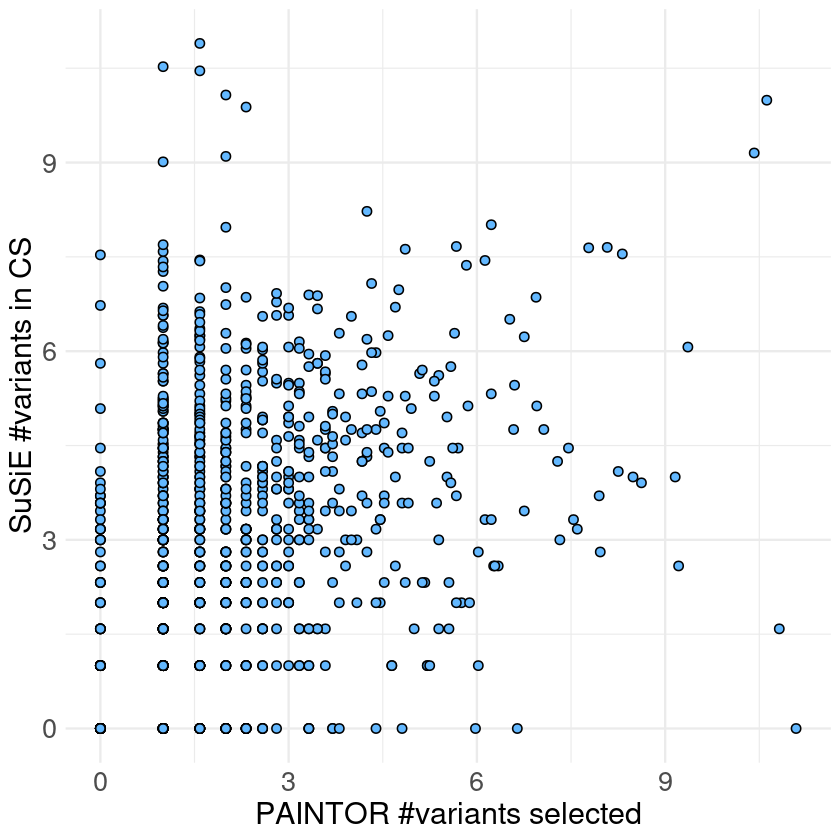

In [42]:
ggplot(susie_paintor, aes(x = log2(SNPs_selected), y = log2(num_snp))) +
geom_point(fill = "steelblue1", shape = 21, size = 2) +
labs(x = "PAINTOR #variants selected", 
     y = "SuSiE #variants in CS") + 
theme_minimal() +
theme(axis.text = element_text(size = 16),
      axis.title = element_text(size = 18))

**BELOW OLD: Cannot plot locuszoom for the second paintor causal, not in locuszoom reference. Used plink to calculate LD for the 2 variants in each population. They are in high LD!**

In [5]:
num_var=2
myFile <- file("paintor/MESDC2/eur_variants_ld.ld.bin", "rb")
eur_ld <- readBin(myFile, what = "numeric", n = num_var*num_var, size = 8)

In [6]:
eur_ld

[1] 1.0000000 0.9060027 0.9060027 1.0000000

In [7]:
myFile <- file("paintor/MESDC2/amr_variants_ld.ld.bin", "rb")
amr_ld <- readBin(myFile, what = "numeric", n = num_var*num_var, size = 8)
amr_ld

[1] 1.0000000 0.7963919 0.7963919 1.0000000

In [8]:
myFile <- file("paintor/MESDC2/afr_variants_ld.ld.bin", "rb")
afr_ld <- readBin(myFile, what = "numeric", n = num_var*num_var, size = 8)
afr_ld

[1] 1.0000000 0.4611216 0.4611216 1.0000000